In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools

%matplotlib inline

## Question 21

In [2]:
### Kernel function generators
def linear_kernel(X1, X2):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
    Returns:
        matrix of size n1xn2, with x1_i^T x2_j in position i,j
    """
    return np.dot(X1,np.transpose(X2))
 
def RBF_kernel(X1,X2,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||x1_i-x2_j||^2/(2 sigma^2)) in position i,j
    """
    #TODO
    mat = scipy.spatial.distance.cdist(X1,X2, metric='sqeuclidean')
    return np.exp(-mat/(2*sigma**2))

def polynomial_kernel(X1, X2, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <x1_i,x2_j>)^degree in position i,j
    """
    return (offset + linear_kernel(X1,X2))**degree

## Question 22

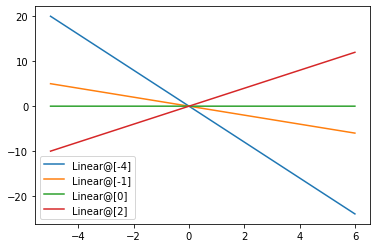

In [3]:
# PLot kernel machine functions
plot_step = .01
xpts = np.arange(-5.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 
 
 

## Question 23

# Part a) 

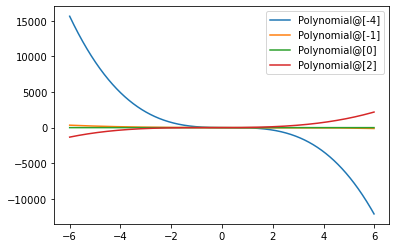

In [4]:
# PLot kernel machine functions
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = polynomial_kernel(prototypes, xpts,1,3) 
for i in range(len(prototypes)):
    label = "Polynomial@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

# Part b

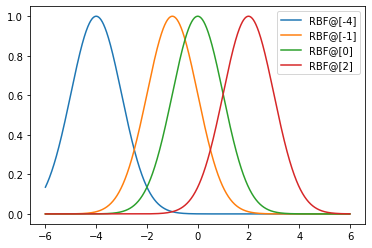

In [5]:
# PLot kernel machine functions
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = RBF_kernel(prototypes, xpts, 1) 
for i in range(len(prototypes)):
    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

## Question 24

In [6]:
class Kernel_Machine(object):
    def __init__(self, kernel, training_points, weights):
        """
        Args:
            kernel(X1,X2) - a function return the cross-kernel matrix between rows of X1 and rows of X2 for kernel k
            training_points - an nxd matrix with rows x_1,..., x_n
            weights - a vector of length n with entries alpha_1,...,alpha_n
        """

        self.kernel = kernel
        self.training_points = training_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R alpha_i k(x_j, mu_i)
        """
        
        kernel_matrix = self.kernel(X, self.training_points)
        return (kernel_matrix @ self.weights) 

In [7]:
k = functools.partial(RBF_kernel, sigma=1)
train_points = np.array([-1,0,1]).reshape(-1,1)
weights = np.array([1,-1,1]).reshape(-1,1)
X = np.array([-4,-1,0,1]).reshape(-1,1)
test_kernel_object = Kernel_Machine(k, train_points, weights)
test_kernel_object.predict(X)

array([[0.01077726],
       [0.52880462],
       [0.21306132],
       [0.52880462]])

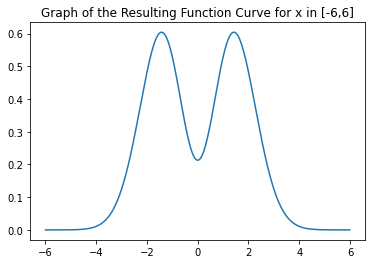

In [8]:
# PLot kernel machine functions
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
# Linear kernel
y = test_kernel_object.predict(xpts).reshape(-1,1)

plt.plot(xpts, y)
plt.title('Graph of the Resulting Function Curve for x in [-6,6]')
plt.show() 

Load train & test data; Convert to column vectors so it generalizes well to data in higher dimensions.

## Question 25

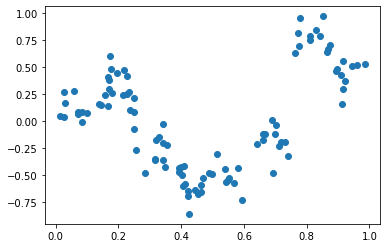

In [9]:
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)
plt.scatter(x_train,y_train)

### Looks like there is not a linear relationship, but rather a potential polynomial or sinusoidal relationship

## Question 26

In [10]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    kernel_matrix = kernel(X,X)
    matrix = ((np.identity(X.shape[0])*l2reg)+kernel_matrix)
    alpha = np.linalg.inv(matrix)@y
    return Kernel_Machine(kernel, X, alpha)

## Question 27

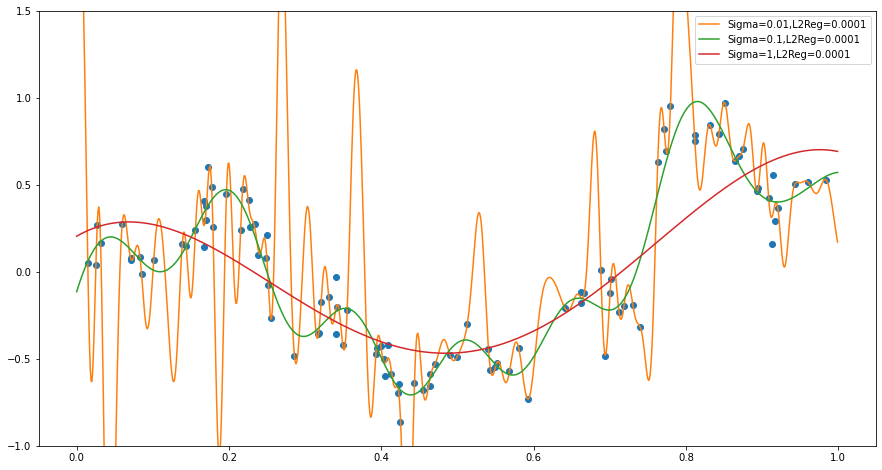

In [11]:
plt.figure(figsize=(15,8))
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
l2reg = 0.0001
for sigma in [.01,.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

### The smaller values of sigma, $\sigma \in 0.01$ for instance, the curve overfits the training data, and does not generalize well (least bias). With a lower sigma, say $\sigma \in 1$ the curve is much smoother with lower amplitude, and still does not fit the training data well (high bias). With $\sigma = .1$ we have the best fit of the curve.

## Problem 28

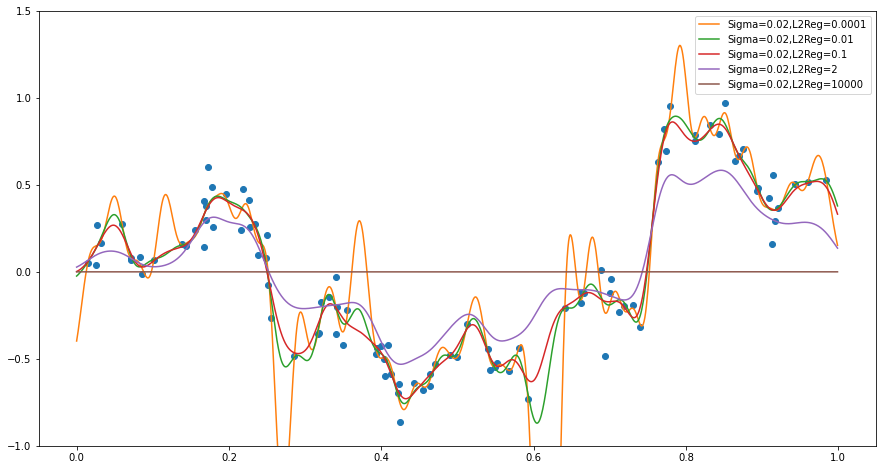

In [12]:
plt.figure(figsize=(15,8))
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2,10000]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)

plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

### As $\lambda \rightarrow \infty$ the curve loses its amplitude, becomes less volatile, and becomes a line. Specifically, its the line that fits all points with least euclidean distance loss, which in this case approaches 0. 

In [13]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return(((self.predict(X)-y)**2).mean()) 

In [14]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [15]:
param_grid = [{'kernel': ['RBF'],'sigma':[.1,1,10], 'l2reg': np.exp2(-np.arange(-5,5,1))},
              {'kernel':['polynomial'],'offset':[-1,0,1], 'degree':[2,3,4],'l2reg':[10, .1, .01] },
              {'kernel':['linear'],'l2reg': [10,1,.01]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False),
                    return_train_score=True
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KernelRidgeRegression(),
             param_grid=[{'kernel': ['RBF'],
                          'l2reg': array([32.    , 16.    ,  8.    ,  4.    ,  2.    ,  1.    ,  0.5   ,
        0.25  ,  0.125 ,  0.0625]),
                          'sigma': [0.1, 1, 10]},
                         {'degree': [2, 3, 4], 'kernel': ['polynomial'],
                          'l2reg': [10, 0.1, 0.01], 'offset': [-1, 0, 1]},
                         {'kernel': ['linear'], 'l2reg': [10, 1, 0.01]}],
             return_train_score=True,
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [16]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
27,-,RBF,0.0625,-,0.1,0.021270,0.023245
24,-,RBF,0.1250,-,0.1,0.022885,0.024608
21,-,RBF,0.2500,-,0.1,0.024845,0.026226
18,-,RBF,0.5000,-,0.1,0.026609,0.028110
15,-,RBF,1.0000,-,0.1,0.027562,0.030319
...,...,...,...,...,...,...,...
5,-,RBF,16.0000,-,10,0.167949,0.210743
2,-,RBF,32.0000,-,10,0.167995,0.210809
51,4,polynomial,0.1000,-1,-,0.188090,0.148359
30,2,polynomial,10.0000,-1,-,0.202746,0.239150


In [17]:
rbf = df_toshow[df_toshow['param_kernel']=='RBF']
rbf_min = rbf['mean_test_score'].min()
rbf_min_row = rbf[rbf['mean_test_score']==rbf_min]
rbf_min_row

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
27,-,RBF,0.0625,-,0.1,0.02127,0.023245


In [18]:
polynomial = df_toshow[df_toshow['param_kernel']=='polynomial']
poly_min = polynomial['mean_test_score'].min()
poly_min_row = polynomial[polynomial['mean_test_score']==poly_min]
poly_min_row

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
54,4,polynomial,0.01,-1,-,0.043454,0.060135


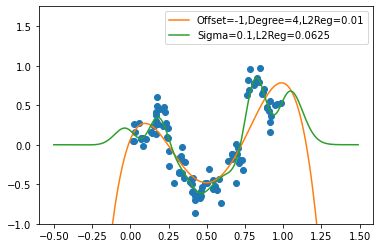

In [20]:
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
#Plot best polynomial fit
offset= -1
degree = 4
l2reg = .01
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best RBF fit
sigma = .1
l2reg= .0625
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.show()

The best hyperparameters for the polynomial kernel were $ Offset = 1, \ Degree = 4, \ l2reg = .01$ and for the RBF kernel the best parameters were $\sigma = .1, \ l2reg = .0625$. Both curves seem to fit the graph reasonably well, though the RBF performed better with a lower min mean_test_score ($RBF = 0.02127, Polynomial = 0.043454$). This could be because the best fitting polynomial curve could not capture the intricacies of the data without increasing its degree substantially, at the risk of over fitting on the train set, while the RBF kernel with its smoother curves could actually capture structure within the data that would generalize well. 

## Question 31

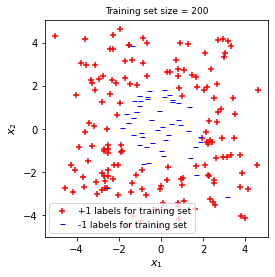

In [21]:
# Load and plot the SVM data
#load the training and test sets
data_train,data_test = np.loadtxt("svm-train.txt"),np.loadtxt("svm-test.txt")
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)

#determine predictions for the training set
yplus = np.ma.masked_where(y_train[:,0]<=0, y_train[:,0])
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train[:,0]>0, y_train[:,0])
xminus = x_train[~np.array(yminus.mask)]

#plot the predictions for the training set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 

pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

### The data appears that it could be seperated by a quadratic boundary, (imagine a circle in the middle classifying the points). Additionally, a RBF boundary could work as well, as there is a circular distribution and you could imagine a guassian kernel coming out (as in the height extends to the z dimension) of the origin of the graph and decreasing otherwise.

## Question 33

In [22]:
class train_soft_svm():
    def __init__(self, x_train, y_train, y_test, k, lambda_reg, epochs):
        self.x_train = x_train
        self.y_train = y_train
        self.y_test = y_test
        self.k = k
        self.lambda_reg = lambda_reg
        self.epochs = epochs
        self.alpha = None
    
    def predict(self, values):
        return self.k(values,self.x_train) @ self.alpha 
    
    def fit(self):
        #Initialize helper variables
        alpha = np.zeros(self.x_train.shape[0])
        epoch, t = 0, 2
        
        #Iterate over the epochs
        while epoch < self.epochs:
            for i in range(len(self.x_train)):
                
                alpha = alpha * (1-(1/t))
                y_hat = self.k(self.x_train[i].reshape(1,2),self.x_train) @ alpha
                value = self.y_train[i] * y_hat
                
                #If we have a missclassification, subtract the second portion of the gradient
                if value < 1:
                    step = y_train[i]/(t*self.lambda_reg)
                    alpha[i]+=1*step
                t += 1
            #Increment epoch counter variable
            epoch += 1     
        self.alpha = alpha
        return True
    
    def accuracy(self,y_hats):
        correct = 0
        for i in range(len(y_hats)):
            if y_hats[i] >= 0 and self.y_test[i] == 1:
                correct += 1
            elif y_hats[i] < 0 and self.y_test[i] == -1:
                correct += 1
        return correct / len(y_hats)
        

## Question 34

In [ ]:
sigmas = np.arange(-20,20,.1)
lambda_regs = np.logspace(-15,6, num=50)
rbf_test_accuracy = []
rbf_lambda_reg = []
rbf_sigma_list = []
for sigma in sigmas:
    for lambda_reg in lambda_regs:
        k = functools.partial(RBF_kernel, sigma=sigma)
        f = train_soft_svm(x_train, y_train, y_test, k, lambda_reg,20)
        f.fit()
        y_bar = f.predict(x_test) 
        rbf_test_accuracy.append(f.accuracy(y_bar))

In [ ]:
degrees = np.arange(1,100,1)
offsets= = np.arange(-100,100, num=200)
polynomial_test_accuracy = []
for degree in degrees:
    for offset in offsets:
        for lambda_reg in lambda_regs:
            k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
            f = train_soft_svm(x_train, y_train, y_test, k, lambda_reg,10)
            f.fit()
            y_bar = f.predict(x_test) 
            rbf_test_accuracy.append(f.accuracy(y_bar))

## Question 35

## RBF Kernel, Optimal Fit

In [ ]:
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
 
sigma=1
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_soft_svm(x_train, y_train, y_test, k, .0001,50)
f.fit()
#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict(x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

print('accuracy:',f.accuracy(y_bar))
#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with RBF Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

### Polynomial Kernel, Optimal Fit

In [ ]:
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
 
sigma=1
k = functools.partial(polynomial_kernel, offset=1,degree=2)
f = train_soft_svm(x_train, y_train, y_test, k, .0001,50)
f.fit()
#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict(x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

print('accuracy:',f.accuracy(y_bar))
#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with RBF Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

### Linear Kernel, Optimal Fit

In [ ]:
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
 
sigma=1
k = functools.partial(linear_kernel)
f = train_soft_svm(x_train, y_train, y_test, k, .0001,50)
f.fit()
#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict(x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

print('accuracy:',f.accuracy(y_bar))
#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with RBF Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()